In [149]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

import datetime
import glob
import numpy as np
import datetime

In [150]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [151]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [152]:
SMALL_SIZE = 15
MEDIUM_SIZE = 17
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [153]:
vac = os.getcwd() + "\\vac\\"
testing = os.getcwd() + "\\testing\\"

In [154]:
country_list = ["Australia","Israel","Netherlands","South Korea","Sweden","United Kingdom"]

aust = pd.read_csv( vac + "Australia" +".csv")
isl = pd.read_csv( vac + "Israel" +".csv" )
nld = pd.read_csv( vac + "Netherlands" +".csv" )
kr = pd.read_csv( vac + "South Korea" +".csv" )
swd = pd.read_csv( vac + "Sweden" +".csv" )
uk = pd.read_csv( vac + "United Kingdom" +".csv" )


In [155]:
# 인구수 :

kr_pop = 51269185 # 화이자 / 아스트리카제네카 / 모더나 / 얀센 
aust_pop = 25499884 # 화이자 / 아스트리카제네카 / 모더나
isl_pop = 8655535 # 화이자 / 모더나
nld_pop = 17134872 # 화이자 / 아스트리카제네카 / 모더나 / 얀센 
swd_pop = 10099265 # 화이자 / 아스트리카제네카 / 모더나
uk_pop = 67886011 # 화이자 / 아스트리카제네카 / 모더나

In [156]:
aust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     225 non-null    object 
 1   total_vaccinations       225 non-null    int64  
 2   people_fully_vaccinated  155 non-null    float64
 3   people_vaccinated        155 non-null    float64
 4   vaccine                  225 non-null    object 
 5   location                 225 non-null    object 
 6   source_url               225 non-null    object 
 7   total_boosters           0 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.2+ KB


In [157]:
aust.head()

,date,total_vaccinations,people_fully_vaccinated,people_vaccinated,vaccine,location,source_url,total_boosters
0,2021-02-14,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
1,2021-02-15,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
2,2021-02-16,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
3,2021-02-17,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
4,2021-02-18,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN


In [158]:
aust.tail()

,date,total_vaccinations,people_fully_vaccinated,people_vaccinated,vaccine,location,source_url,total_boosters
220,2021-09-30,28091630,11386339.0,16705291.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN
221,2021-10-01,28419347,11571446.0,16847901.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN
222,2021-10-02,28630736,11689936.0,16940800.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN
223,2021-10-03,28769273,11766864.0,17002409.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN
224,2021-10-04,28955015,11868894.0,17086121.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN


In [159]:
aust

,date,total_vaccinations,people_fully_vaccinated,people_vaccinated,vaccine,location,source_url,total_boosters
0,2021-02-14,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
1,2021-02-15,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
2,2021-02-16,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
3,2021-02-17,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
4,2021-02-18,0,0.0,0.0,Pfizer/BioNTech,Australia,https://covidlive.com.au/covid-live.json,NaN
...,...,...,...,...,...,...,...,...
220,2021-09-30,28091630,11386339.0,16705291.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN
221,2021-10-01,28419347,11571446.0,16847901.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN
222,2021-10-02,28630736,11689936.0,16940800.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN
223,2021-10-03,28769273,11766864.0,17002409.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Australia,https://covidlive.com.au/covid-live.json,NaN


In [160]:
aust["people_fully_vaccinated"].interpolate(inplace=True)

In [161]:
aust.loc[: , "people_vaccinated"] = aust.loc[: , "total_vaccinations"] - aust.loc[:, "people_fully_vaccinated"]

In [162]:
# aust.interpolate(method='values' , inplace=True)
aust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     225 non-null    object 
 1   total_vaccinations       225 non-null    int64  
 2   people_fully_vaccinated  225 non-null    float64
 3   people_vaccinated        225 non-null    float64
 4   vaccine                  225 non-null    object 
 5   location                 225 non-null    object 
 6   source_url               225 non-null    object 
 7   total_boosters           0 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.2+ KB


In [163]:
aust['date'] = pd.to_datetime(aust['date']).dt.date

In [164]:
# 판다스 날짜 함수
def convert_to_pdDate(country):
    country['date'] = pd.to_datetime(country['date']).dt.date

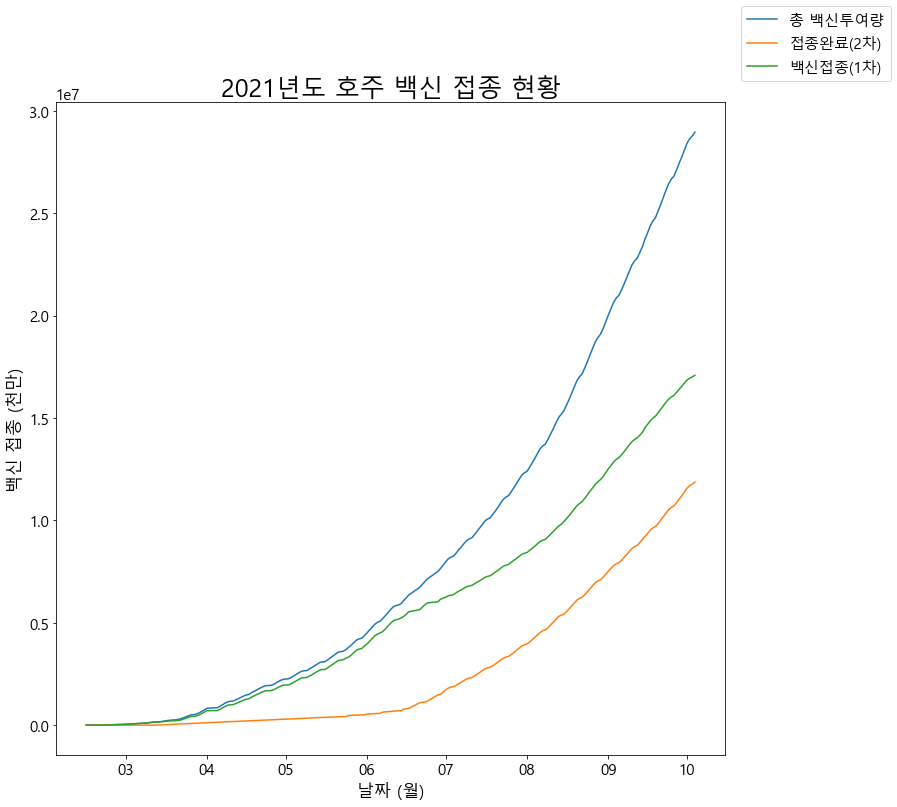

In [165]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(aust.date,
       aust["total_vaccinations"], label="총 백신투여량")

ax.plot(aust.date,
       aust["people_fully_vaccinated"], label="접종완료(2차)")

ax.plot(aust.date,
       aust["people_vaccinated"], label="백신접종(1차)")


# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="백신 접종 (천만)",
       title="2021년도 호주 백신 접종 현황")

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels, loc = 'upper right', bbox_to_anchor=(1.1, 1))
    
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [166]:
def draw_stats_graph(country, country_str):
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(12, 12))

    # Add x-axis and y-axis
    ax.plot(country.date,
           country["total_vaccinations"], label="총 백신투여량")

    ax.plot(country.date,
           country["people_fully_vaccinated"], label="접종완료(2차)")

    ax.plot(country.date,
           country["people_vaccinated"], label="백신접종(1차)")
    
    if(country["total_boosters"].isnull().sum() == 0):
        ax.plot(country.date,
           country["total_boosters"], label="부스터 샷")
    
    # Set title and labels for axes
    ax.set(xlabel="날짜 (월)",
           ylabel="백신 접종 (천만)",
           title= f"2021년도 {country_str} 백신 접종 현황")

    lines = []
    labels = []

    for ax in fig.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)

    fig.legend(lines, labels, loc = 'upper right', bbox_to_anchor=(1.1, 1))

    date_form = DateFormatter("%m월")
    ax.xaxis.set_major_formatter(date_form)

    plt.show()

In [167]:
# % 로 구하기
# 총 백신투여량 % 구하기
aust["total_vac_perc"] = round(aust.loc[: , "total_vaccinations"] / (aust_pop * 2) * 100 , 2)
aust["fully_vac_perc"] = round(aust.loc[: , "people_fully_vaccinated"] / (aust_pop * 2) * 100 , 2)
aust["first_vac_perc"] = round(aust.loc[: , "people_vaccinated"] / (aust_pop * 2) * 100 , 2)

In [168]:
# 퍼센티지 함수 만들기
def add_percentage_row(country, country_pop):
    country["total_vac_perc"] = round(country.loc[: , "total_vaccinations"] / (country_pop * 2) * 100 , 2)
    country["fully_vac_perc"] = round(country.loc[: , "people_fully_vaccinated"] / (country_pop * 2) * 100 , 2)
    country["first_vac_perc"] = round(country.loc[: , "people_vaccinated"] / (country_pop * 2) * 100 , 2)
    if (country["total_boosters"].isnull().sum() == 0):
        country["booster_perc"] = round(country.loc[: , "total_boosters"] / (country_pop * 2) * 100 , 2)

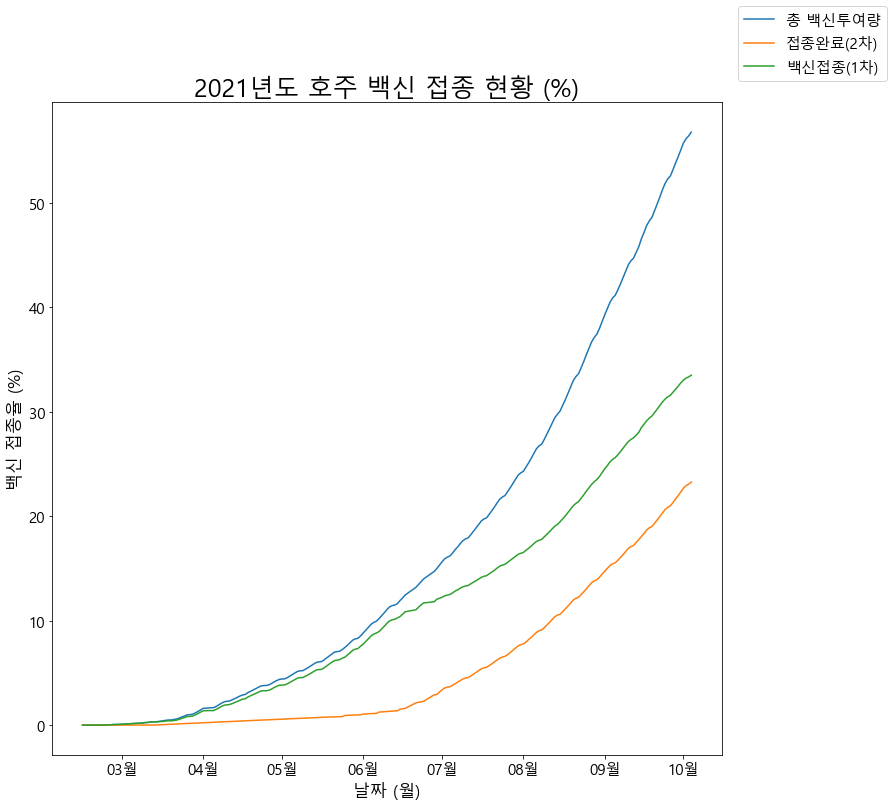

In [169]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(aust.date,
       aust["total_vac_perc"], label="총 백신투여량")

ax.plot(aust.date,
       aust["fully_vac_perc"], label="접종완료(2차)")

ax.plot(aust.date,
       aust["first_vac_perc"], label="백신접종(1차)")


# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="백신 접종율 (%)",
       title="2021년도 호주 백신 접종 현황 (%)"
       )

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels, loc = 'upper right', bbox_to_anchor=(1.1, 1))
    
date_form = DateFormatter("%m월")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [170]:
def draw_perc_graph(country, country_str):
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(12, 12))

    # Add x-axis and y-axis
    ax.plot(country.date,
           country["total_vac_perc"], label="총 백신투여량")

    ax.plot(country.date,
           country["fully_vac_perc"], label="접종완료(2차)")

    ax.plot(country.date,
           country["first_vac_perc"], label="백신접종(1차)")
    
    if(country["total_boosters"].isnull().sum() == 0):
        ax.plot(country.date,
           country["booster_perc"], label="부스터 샷")


    # Set title and labels for axes
    ax.set(xlabel="날짜 (월)",
           ylabel="백신 접종율 (%)",
           title= f"2021년도 {country_str} 백신 접종 현황 (%)"
           )

    lines = []
    labels = []

    for ax in fig.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)

    fig.legend(lines, labels, loc = 'upper right', bbox_to_anchor=(1.1, 1))
    date_form = DateFormatter("%m월")
    ax.xaxis.set_major_formatter(date_form)

    plt.show()

In [171]:
def draw_individual_graph(country, country_pop, country_str):
    convert_to_pdDate(country)
    add_percentage_row(country , country_pop)
    draw_stats_graph(country, country_str)
    draw_perc_graph(country, country_str)

In [172]:
isl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     290 non-null    object 
 1   total_vaccinations       290 non-null    int64  
 2   people_vaccinated        290 non-null    int64  
 3   people_fully_vaccinated  274 non-null    float64
 4   total_boosters           290 non-null    int64  
 5   location                 290 non-null    object 
 6   source_url               290 non-null    object 
 7   vaccine                  290 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 18.2+ KB


In [173]:
convert_to_pdDate(isl)

In [174]:
isl["people_fully_vaccinated"] = isl["people_fully_vaccinated"].fillna(0)

In [175]:
add_percentage_row(isl , isl_pop)

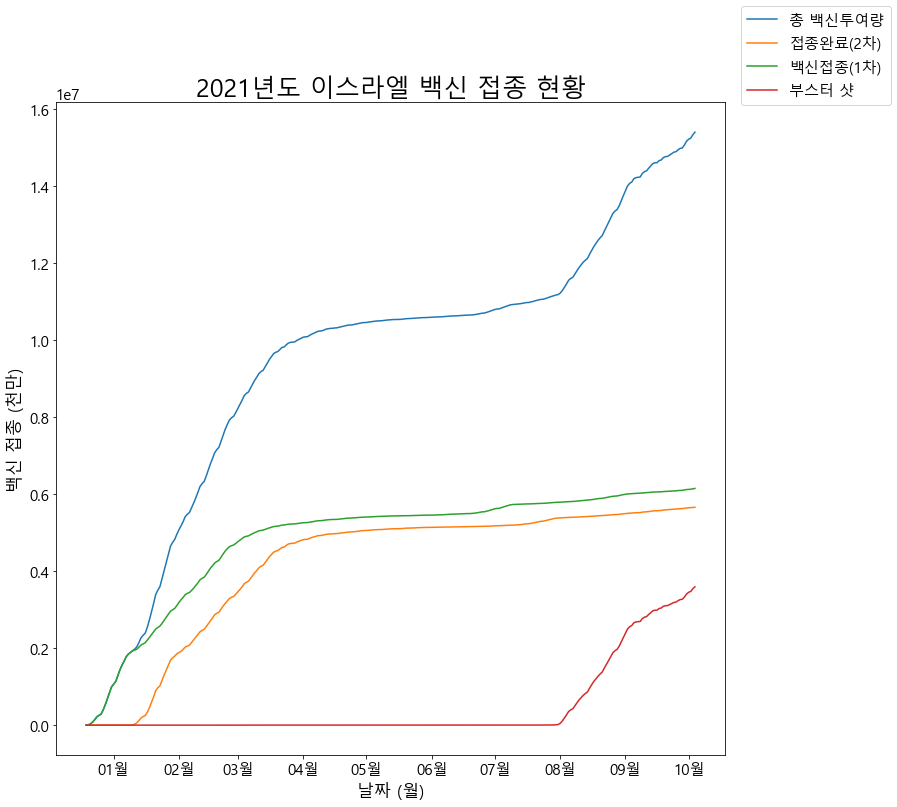

In [176]:
draw_stats_graph(isl, "이스라엘")

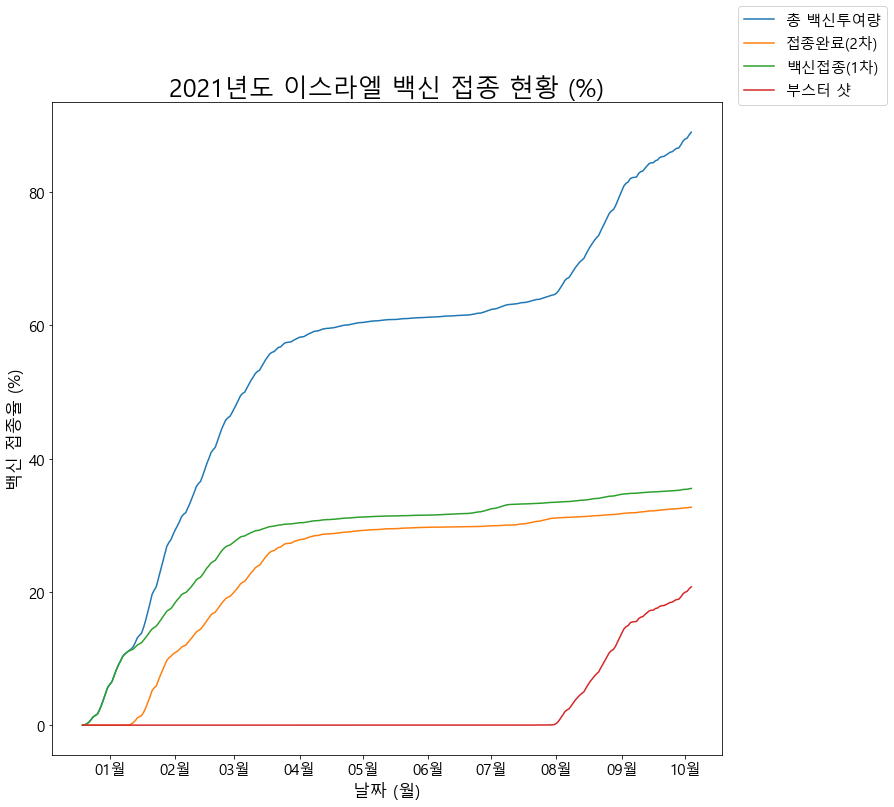

In [177]:
draw_perc_graph(isl, "이스라엘")

In [178]:
nld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_vaccinations       217 non-null    float64
 1   date                     227 non-null    object 
 2   people_fully_vaccinated  38 non-null     float64
 3   people_vaccinated        38 non-null     float64
 4   location                 227 non-null    object 
 5   source_url               227 non-null    object 
 6   vaccine                  227 non-null    object 
 7   total_boosters           0 non-null      float64
dtypes: float64(4), object(4)
memory usage: 14.3+ KB


In [179]:
nld["total_vaccinations"].interpolate(inplace=True)
nld["people_vaccinated"].interpolate(inplace=True)

In [180]:
nld[0 , "people_vaccinated"] = 0
nld["people_vaccinated"].interpolate(inplace=True)
nld["people_vaccinated"]

0               NaN
1               NaN
2               NaN
3               NaN
4      3.375700e+04
           ...     
222    1.276513e+07
223    1.278821e+07
224    1.281129e+07
225    1.281129e+07
226    1.281129e+07
Name: people_vaccinated, Length: 227, dtype: float64

In [181]:
nld["people_fully_vaccinated"] = nld["total_vaccinations"] - nld["people_vaccinated"]

In [182]:
convert_to_pdDate(nld)
add_percentage_row(nld , nld_pop)

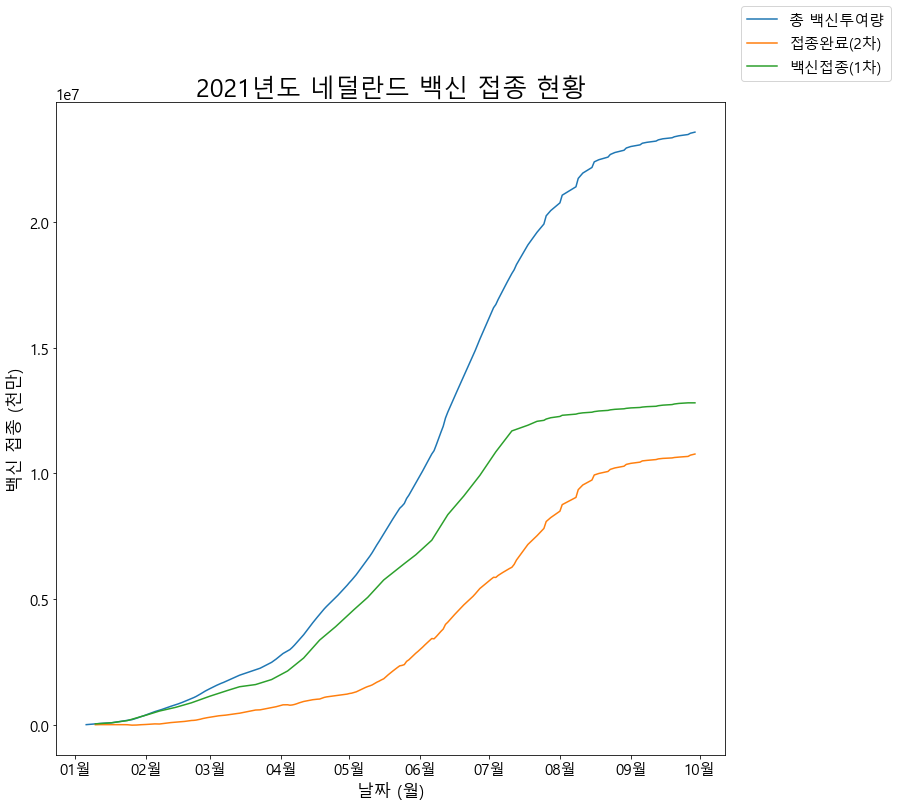

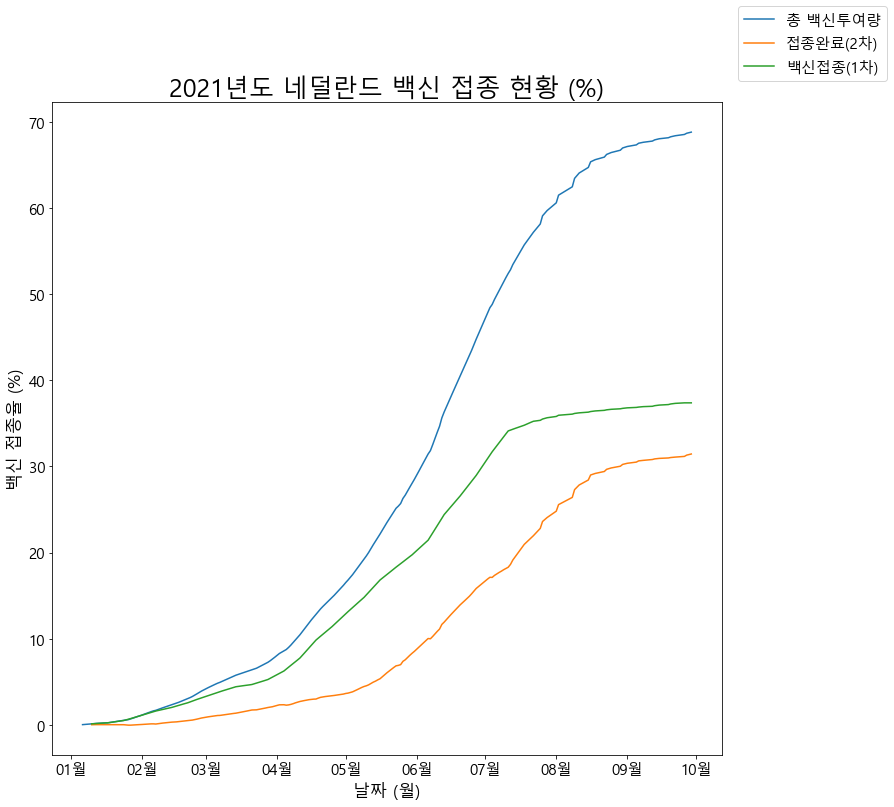

In [183]:
draw_stats_graph(nld, "네덜란드")
draw_perc_graph(nld, "네덜란드")

In [184]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 221 non-null    object 
 1   date                     221 non-null    object 
 2   vaccine                  221 non-null    object 
 3   source_url               221 non-null    object 
 4   total_vaccinations       221 non-null    int64  
 5   people_vaccinated        221 non-null    int64  
 6   people_fully_vaccinated  221 non-null    int64  
 7   total_boosters           0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 13.9+ KB


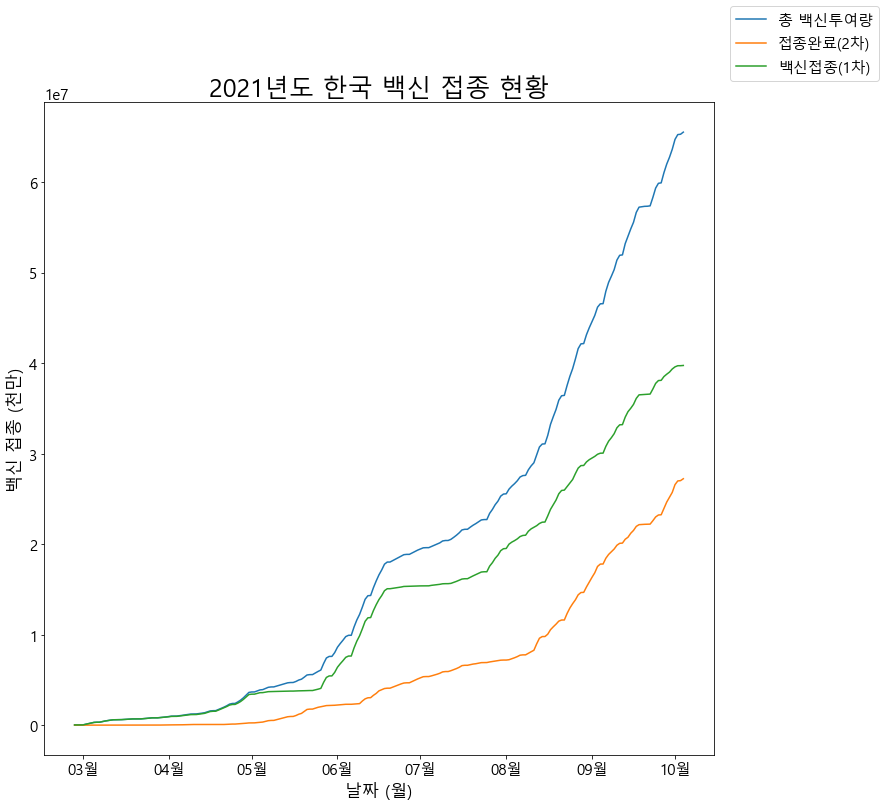

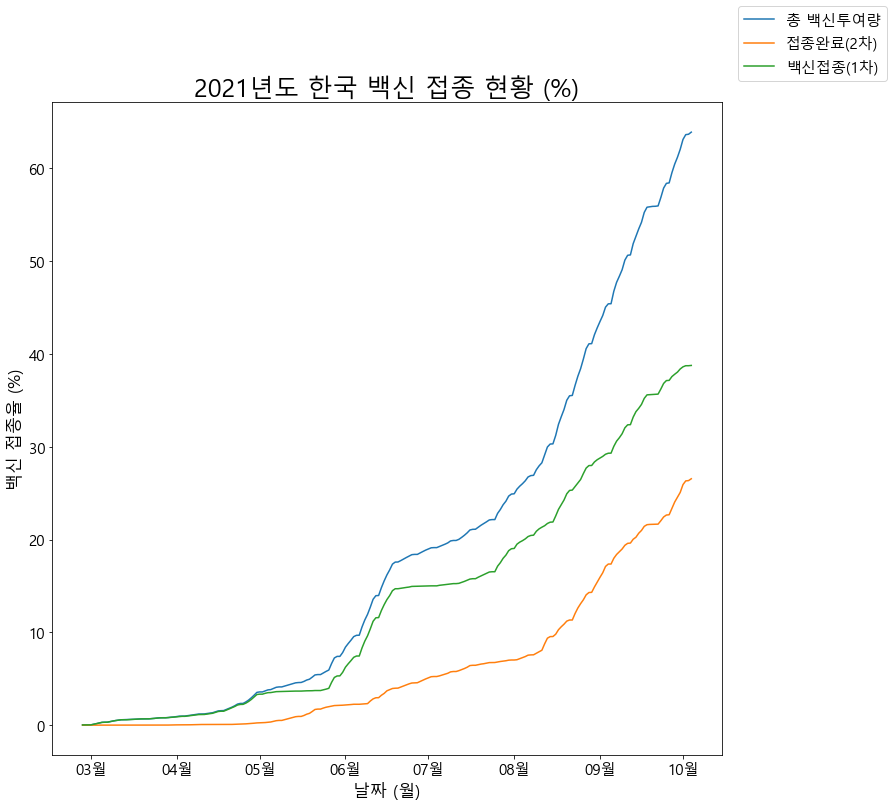

In [185]:
convert_to_pdDate(kr)
add_percentage_row(kr , kr_pop)
draw_stats_graph(kr, "한국")
draw_perc_graph(kr, "한국")

In [186]:
swd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     44 non-null     object 
 1   people_vaccinated        44 non-null     int64  
 2   people_fully_vaccinated  44 non-null     int64  
 3   total_vaccinations       44 non-null     int64  
 4   vaccine                  44 non-null     object 
 5   location                 44 non-null     object 
 6   source_url               44 non-null     object 
 7   total_boosters           0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.9+ KB


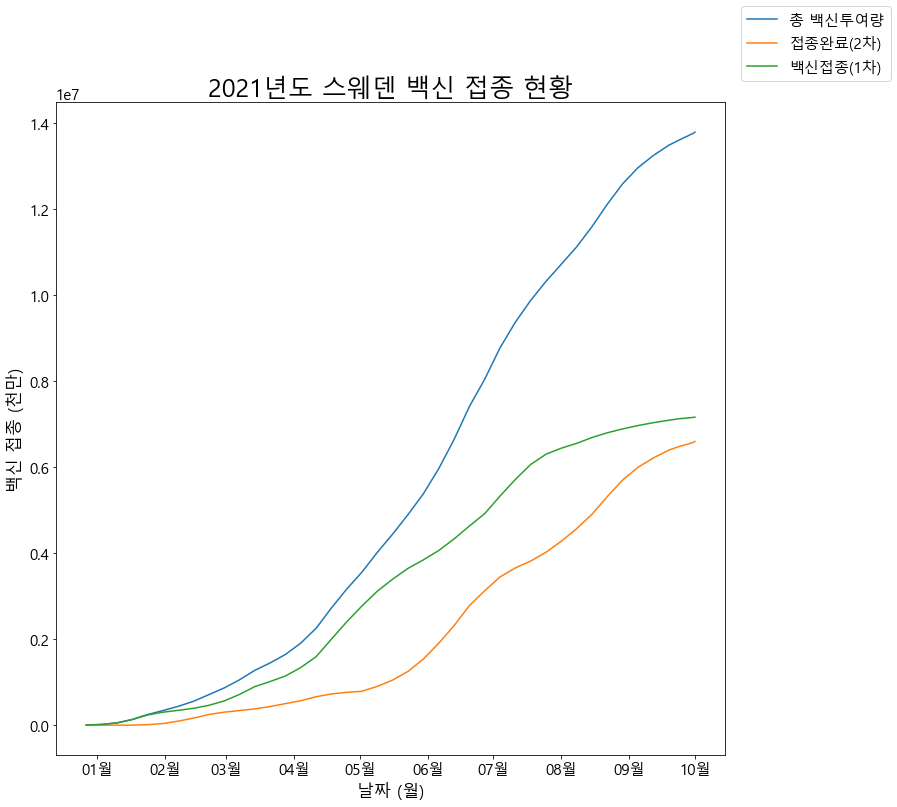

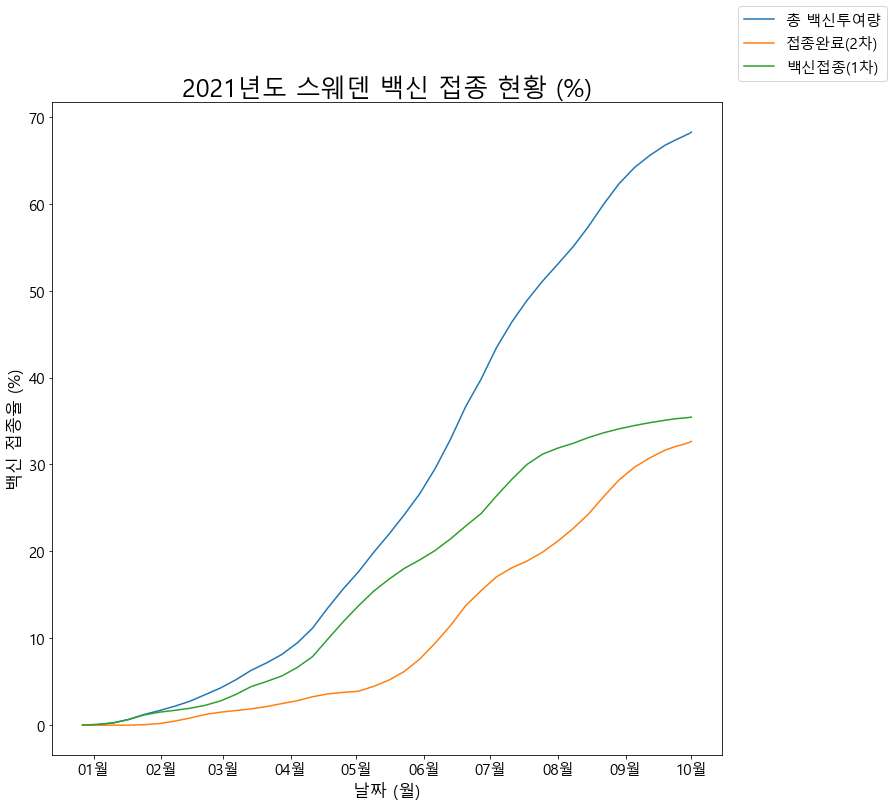

In [187]:
draw_individual_graph(swd, swd_pop, "스웨덴")

In [188]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 271 non-null    object 
 1   date                     271 non-null    object 
 2   vaccine                  271 non-null    object 
 3   source_url               271 non-null    object 
 4   total_vaccinations       271 non-null    int64  
 5   people_vaccinated        271 non-null    int64  
 6   people_fully_vaccinated  267 non-null    float64
 7   total_boosters           0 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 17.1+ KB


In [189]:
uk["people_fully_vaccinated"] = uk["people_fully_vaccinated"].fillna(0)
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 271 non-null    object 
 1   date                     271 non-null    object 
 2   vaccine                  271 non-null    object 
 3   source_url               271 non-null    object 
 4   total_vaccinations       271 non-null    int64  
 5   people_vaccinated        271 non-null    int64  
 6   people_fully_vaccinated  271 non-null    float64
 7   total_boosters           0 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 17.1+ KB


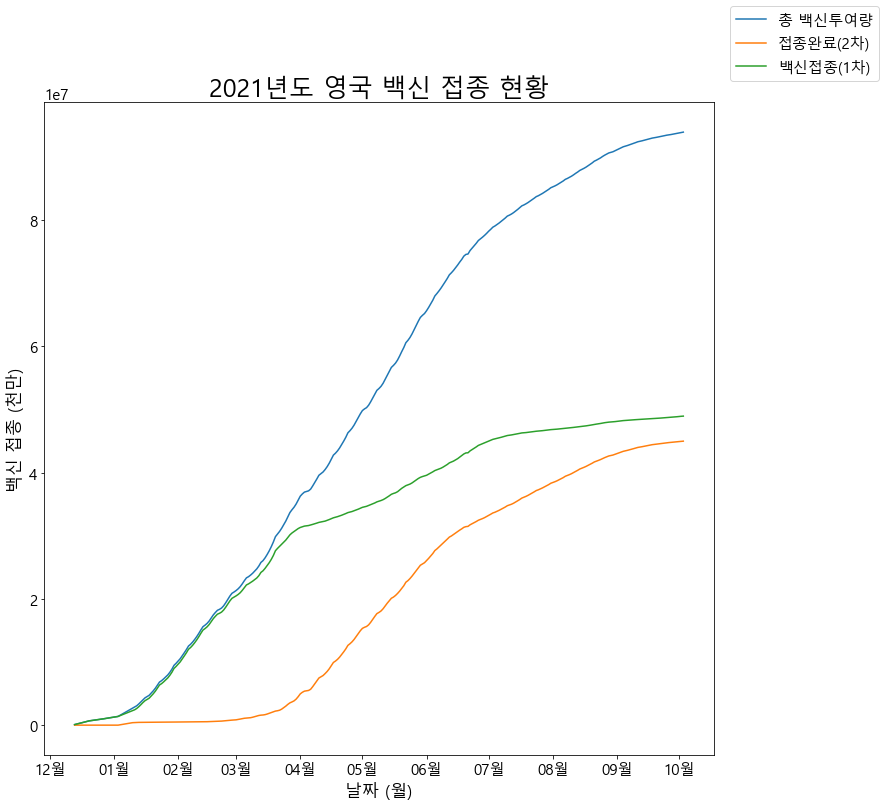

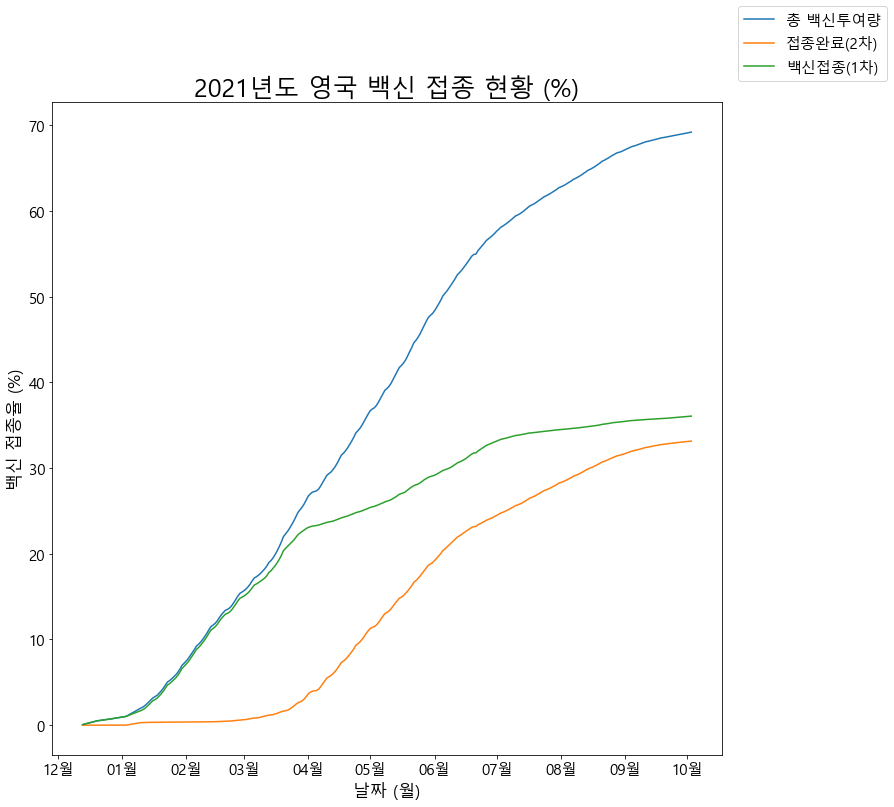

In [190]:
draw_individual_graph(uk, uk_pop, "영국")

In [191]:
test_df = pd.read_csv(testing + "covid-testing-all-observations.csv")

C:\Users\jypark\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [192]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66184 entries, 0 to 66183
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Entity                                         66184 non-null  object 
 1   ISO code                                       66184 non-null  object 
 2   Date                                           66184 non-null  object 
 3   Source URL                                     56256 non-null  object 
 4   Source label                                   56459 non-null  object 
 5   Notes                                          7152 non-null   object 
 6   Daily change in cumulative total               53638 non-null  float64
 7   Cumulative total                               53758 non-null  float64
 8   Cumulative total per thousand                  53758 non-null  float64
 9   Daily change in cumulative total per thousand  536

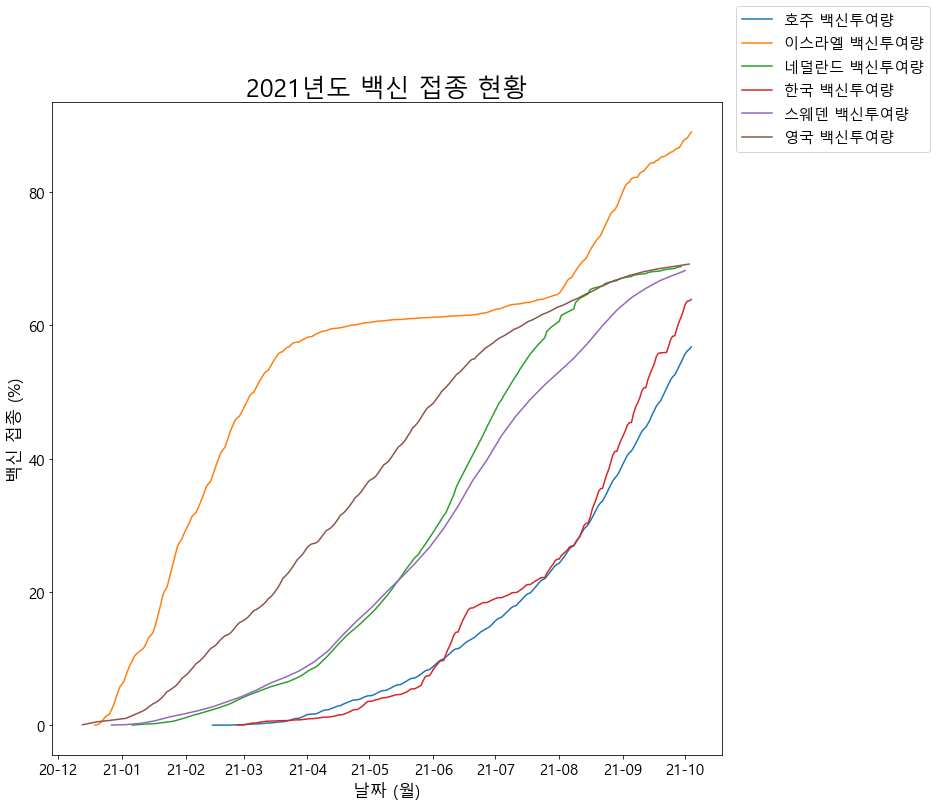

In [193]:
# 전체 나라 데이터 비교

# aust, isl, nld, kr, swd, uk

country_list = [aust, isl, nld, kr, swd, uk]
country_nm = ["호주", "이스라엘", "네덜란드", "한국", "스웨덴", "영국"]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis

# total_vac_perc
# fully_vac_perc
# first_vac_perc  

for country, country_name in zip(country_list, country_nm):
    ax.plot(country.date,
           country["total_vac_perc"], label= f"{country_name} 백신투여량")

# ax.plot(aust.date,
#        aust["people_fully_vaccinated"], label="접종완료(2차)")

# ax.plot(aust.date,
#        aust["people_vaccinated"], label="백신접종(1차)")


# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="백신 접종 (%)",
       title="2021년도 백신 접종 현황")

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels, loc = 'upper right', bbox_to_anchor=(1.15, 1))
    
date_form = DateFormatter("%y-%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()


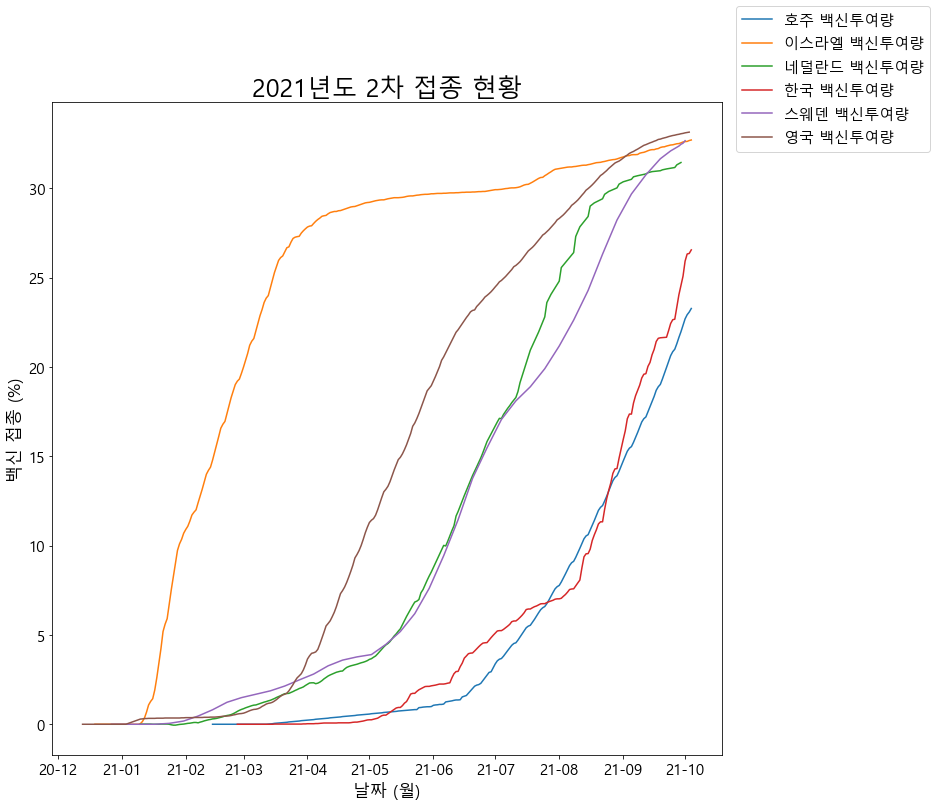

In [194]:
# 전체 나라 데이터 비교

# aust, isl, nld, kr, swd, uk

country_list = [aust, isl, nld, kr, swd, uk]
country_nm = ["호주", "이스라엘", "네덜란드", "한국", "스웨덴", "영국"]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis

# total_vac_perc
# fully_vac_perc
# first_vac_perc  

for country, country_name in zip(country_list, country_nm):
    ax.plot(country.date,
           country["fully_vac_perc"], label= f"{country_name} 백신투여량")

# ax.plot(aust.date,
#        aust["people_fully_vaccinated"], label="접종완료(2차)")

# ax.plot(aust.date,
#        aust["people_vaccinated"], label="백신접종(1차)")


# Set title and labels for axes
ax.set(xlabel="날짜 (월)",
       ylabel="백신 접종 (%)",
       title="2021년도 2차 접종 현황")

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels, loc = 'upper right' , bbox_to_anchor=(1.15, 1))
    
date_form = DateFormatter("%y-%m")
ax.xaxis.set_major_formatter(date_form)

plt.show()
